In [1]:
from rockit import *
from pylab import *
import casadi as ca
from numpy import cos, pi

ocp = Ocp(T=24*3)

T = ocp.state()

C = ocp.variable()
R = ocp.variable()


ocp.set_initial(C,1000)
ocp.set_initial(R,0.002)


heating = 10000

Tamb = 5*cos((ocp.t-12)/24*2*pi)

ocp.set_der(T,(heating-(1/R)*(T-Tamb))/C)

ocp.method(DirectCollocation(N=24*3))
ocp.solver('ipopt')

Tmax = 20
Tmin = 17

ocp.subject_to(T<=Tmax)
ocp.subject_to(T>=Tmin)


mean = ocp.sum(T)/ocp.sum(1)

ocp.add_objective(-ocp.sum((mean-T)**2))


ocp.subject_to(ocp.at_t0(T)==ocp.at_tf(T))


sol = ocp.solve()


print(sol.value(C),sol.value(R))

1 72 <class 'int'> <class 'int'>
1 72 <class 'int'> <class 'int'>
1 72 <class 'int'> <class 'int'>

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     2450
Number of nonzeros in inequality constraint Jacobian.:      146
Number of nonzeros in Lagrangian Hessian.............:     3280

Total number of variables............................:      363
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:   

In [2]:
C_ref = 6550
R_ref = 0.00185

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     1874
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      361
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      361
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.88e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

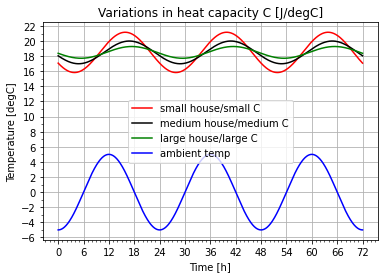

In [3]:
C = C_ref
R = R_ref

for i,C in enumerate([0.5*C_ref,C_ref,2*C_ref]):

    ocp = Ocp(T=24*3)

    T = ocp.state()


    heating = 10000

    Tamb = 5*cos((ocp.t-12)/24*2*pi)

    ocp.set_der(T,(heating-(1/R)*(T-Tamb))/C)

    ocp.method(DirectCollocation(N=24*3))
    ocp.solver('ipopt')


    ocp.subject_to(ocp.at_t0(T)==ocp.at_tf(T))

    sol = ocp.solve()


    [ts,Tsol] = sol.sample(T,grid='integrator',refine=10)

    [ts,Tambsol] = sol.sample(Tamb,grid='integrator',refine=10)

    [ts,heatingsol] = sol.sample(heating,grid='integrator',refine=10)
    
    if i==0:
        plot(ts,Tsol,'r',label="small house/small C")
    if i==1:
        plot(ts,Tsol,'k',label="medium house/medium C")
    if i==2:
        plot(ts,Tsol,'g',label="large house/large C")
        
plot(ts,Tambsol,'b',label="ambient temp")

title('Variations in heat capacity C [J/degC]')
legend()

grid(True)


gca().xaxis.set_major_locator(plt.MultipleLocator(base=6))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=2))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=1))
ylabel('Temperature [degC]')
xlabel('Time [h]')

show()

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     1874
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      361
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      361
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.04e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

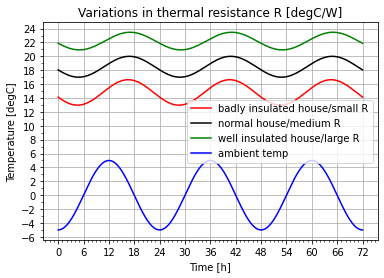

In [4]:
C = C_ref
R = R_ref

for i,R in enumerate([0.8*R_ref,R_ref,1.2*R_ref]):

    ocp = Ocp(T=24*3)

    T = ocp.state()


    heating = 10000

    Tamb = 5*cos((ocp.t-12)/24*2*pi)

    ocp.set_der(T,(heating-(1/R)*(T-Tamb))/C)

    ocp.method(DirectCollocation(N=24*3))
    ocp.solver('ipopt')


    ocp.subject_to(ocp.at_t0(T)==ocp.at_tf(T))

    sol = ocp.solve()


    [ts,Tsol] = sol.sample(T,grid='integrator',refine=10)

    [ts,Tambsol] = sol.sample(Tamb,grid='integrator',refine=10)

    [ts,heatingsol] = sol.sample(heating,grid='integrator',refine=10)
    
    if i==0:
        plot(ts,Tsol,'r',label="badly insulated house/small R")
    if i==1:
        plot(ts,Tsol,'k',label="normal house/medium R")
        Tref = Tsol
    if i==2:
        plot(ts,Tsol,'g',label="well insulated house/large R")
        
plot(ts,Tambsol,'b',label="ambient temp")

title('Variations in thermal resistance R [degC/W]')
legend()

grid(True)


gca().xaxis.set_major_locator(plt.MultipleLocator(base=6))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=2))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=1))
ylabel('Temperature [degC]')
xlabel('Time [h]')

show()

In [5]:
# Stop ambient at max -> equilibrium
# From equilibrium -> shock in R, shock in Heating

def simulate(R=R_ref,C=C_ref,H=10000,Tamb=20,T0=20,grid=None):
    t = ca.MX.sym('t')
    T = ca.MX.sym('T')
    if callable(R): R = R(t)
    if callable(C): C = C(t)
    if callable(Tamb): Tamb = Tamb(t)
    if callable(H): H = H(t)
    
    ode = {"x": T, "t":t,"ode": (H-(1/R)*(T-Tamb))/C}
    sim = ca.integrator('sim','cvodes',ode,grid[0],grid)
    return np.array(sim(x0=T0)["xf"]).squeeze()
    

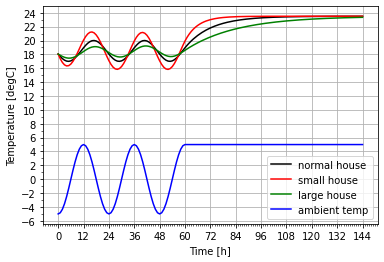

In [6]:
ts = np.linspace(0,24*6,24*6+1)
def Tamb(t):
    return ca.if_else(t>=60,5,5*cos((t-12)/24*2*pi))
xf = simulate(T0=Tref[0],Tamb=Tamb,grid=ts)


plot(ts,xf,'k',label='normal house')
plot(ts,simulate(T0=Tref[0],Tamb=Tamb,grid=ts,C=0.5*C_ref),'r',label='small house')
plot(ts,simulate(T0=Tref[0],Tamb=Tamb,grid=ts,C=2*C_ref),'g',label='large house')

grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=12))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=2))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=1))
ylabel('Temperature [degC]')
xlabel('Time [h]')

plot(ts, Tamb(ts), 'b',label='ambient temp')
legend()

show()

In [7]:
# Steady state
heating = 10000
C = C_ref
R = R_ref
Tamb = 5
solver = ca.rootfinder('solver', 'newton', {'x': T, 'g': (heating-(1/R)*(T-Tamb))/C})
Tsteady = solver(x0=20)["x"]
print(Tsteady)

23.5


24.41672543069648


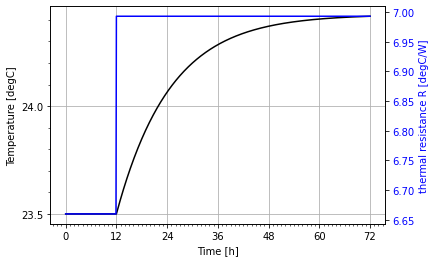

In [8]:
ts = np.linspace(0,24*3,24*3*10+1)
def R(t):
    return ca.if_else(t>=12,1.05*R_ref,R_ref)
xf = simulate(T0=Tsteady,Tamb=Tamb,grid=ts,R=R)

subplots()

plot(ts,xf,'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=12))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts, R(ts)*3600, 'b')
tick_params(axis='y', labelcolor='b')
ylabel('thermal resistance R [degC/W]',color='b')

show()

24.4184623507582


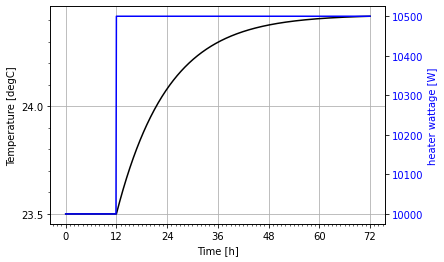

In [9]:
ts = np.linspace(0,24*3,24*3*10+1)
def H(t):
    return ca.if_else(t>=12,10000*1.05,10000)
xf = simulate(T0=Tsteady,Tamb=Tamb,grid=ts,H=H)

subplots()

plot(ts,xf,'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=12))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts, H(ts), 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')

show()

#ramp

24.0877935833461


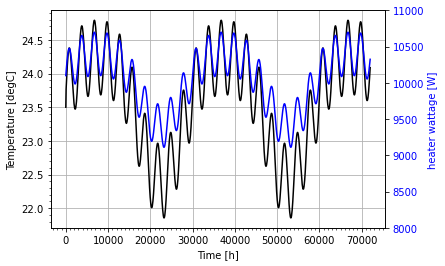

In [10]:
ts = np.linspace(0,24*3000,1000)
def H(t):
    return 10000*(1+0.03*sin(t/5/600*2*pi)+0.05*sin(t/5/6000*2*pi)+0.01*cos(t/5/3000*2*pi))
xf = simulate(T0=Tsteady,Tamb=Tamb,grid=ts,H=H)

subplots()

plot(ts,xf,'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1000))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts, H(ts), 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')
ylim([8000,11000])

show()

Text(0, 0.5, 'Temperature [degC]')

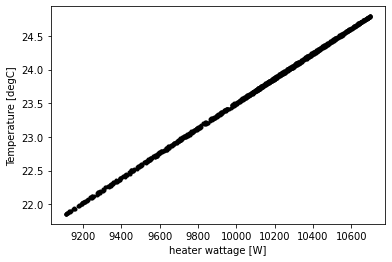

In [11]:
plot(np.array(H(ts))[1:],np.array(xf)[1:],'.k')
xlabel('heater wattage [W]')
ylabel('Temperature [degC]')

25.938960750865483


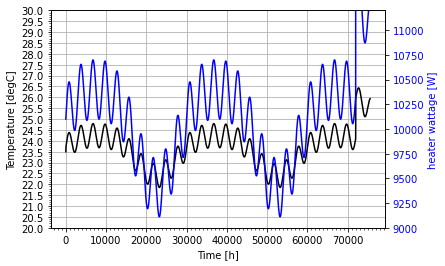

In [12]:
ts = np.linspace(0,24*3000*1.05,100000)
def H(t):
    baseline = 10000*(1+0.03*sin(t/5/600*2*pi)+0.05*sin(t/5/6000*2*pi)+0.01*cos(t/5/3000*2*pi))
    tstart = 24*3000
    return baseline+ca.if_else(t>=tstart,1000,0)
    #return baseline+ca.if_else(t>=tstart,ca.fmin(10*(t-tstart),500),0)
xf = simulate(T0=Tsteady,Tamb=Tamb,grid=ts,H=H)


Nstart = 0
Nend = 100000
subplots()

plot(ts[Nstart:Nend],xf[Nstart:Nend],'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1000))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')
ylim([20,30])

twinx()

plot(ts[Nstart:Nend], H(ts)[Nstart:Nend], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')
ylim([9000,11200])

show()

25.938960750865483


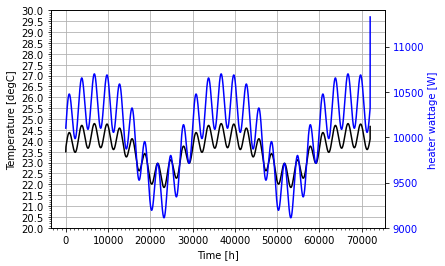

In [13]:
Nstart = 0
Nend = 100000-4760+4
subplots()

plot(ts[Nstart:Nend],xf[Nstart:Nend],'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1000))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')
ylim([20,30])

twinx()

plot(ts[Nstart:Nend], H(ts)[Nstart:Nend], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')
ylim([9000,11400])

show()

25.938960750865483


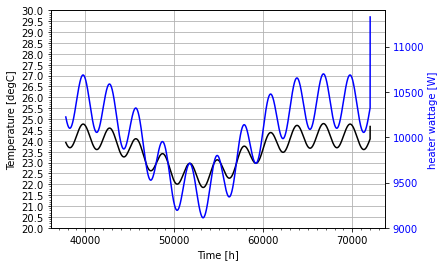

In [14]:
Nstart = 50000
Nend = 100000-4760+4
subplots()

plot(ts[Nstart:Nend],xf[Nstart:Nend],'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1000))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')
ylim([20,30])

twinx()

plot(ts[Nstart:Nend], H(ts)[Nstart:Nend], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')
ylim([9000,11400])

show()

25.938960750865483


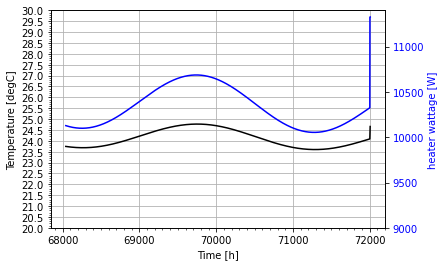

In [15]:
Nstart = 90000
Nend = 100000-4760+4
subplots()

plot(ts[Nstart:Nend],xf[Nstart:Nend],'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=1000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=100))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')
ylim([20,30])

twinx()

plot(ts[Nstart:Nend], H(ts)[Nstart:Nend], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')
ylim([9000,11400])

show()

25.938960750865483


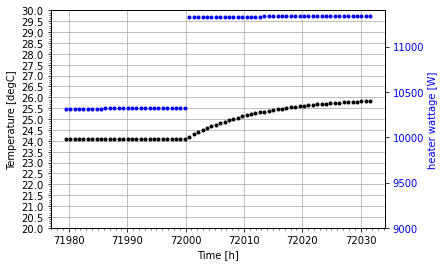

In [16]:
Nstart = 100000-4760-30
Nend = 100000-4760+40
subplots()

plot(ts[Nstart:Nend],xf[Nstart:Nend],'k.')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')
ylim([20,30])

twinx()

plot(ts[Nstart:Nend], H(ts)[Nstart:Nend], 'b.')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')
ylim([9000,11400])

show()

25.013953820151432


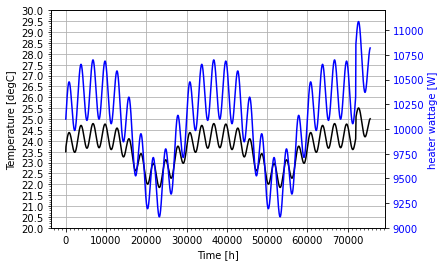

In [17]:
ts = np.linspace(0,24*3000*1.05,100000)
def H(t):
    baseline = 10000*(1+0.03*sin(t/5/600*2*pi)+0.05*sin(t/5/6000*2*pi)+0.01*cos(t/5/3000*2*pi))
    tstart = 24*3000
    return baseline+ca.if_else(t>=tstart,ca.fmin(5*(t-tstart)**2,500),0)
xf = simulate(T0=Tsteady,Tamb=Tamb,grid=ts,H=H)


Nstart = 0
Nend = 100000
subplots()

plot(ts[Nstart:Nend],xf[Nstart:Nend],'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1000))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')
ylim([20,30])

twinx()

plot(ts[Nstart:Nend], H(ts)[Nstart:Nend], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')
ylim([9000,11200])

show()

25.013953820151432


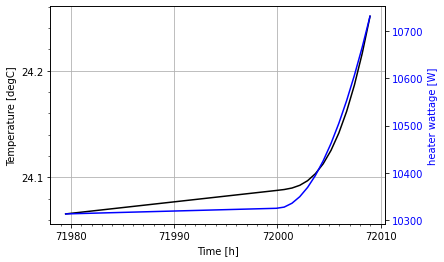

In [18]:
Nstart = 100000-4760-30
Nend = 100000-4760+40-30
subplots()

plot(ts[Nstart:Nend],xf[Nstart:Nend],'k-')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.1))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.02))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts[Nstart:Nend], H(ts)[Nstart:Nend], 'b-')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')

show()

In [19]:
# Stop ambient at max -> equilibrium
# From equilibrium -> shock in R, shock in Heating

def simulate2(R=R_ref,C=C_ref,Tamb=20,T0=20,c0=300,grid=None,Hoffset=0,dc_offset=0,dT_offset=0):
    t = ca.MX.sym('t')
    T = ca.MX.sym('T')
    c = ca.MX.sym('c')
    if callable(R): R = R(t)
    if callable(C): C = C(t)
    if callable(Tamb): Tamb = Tamb(t)

    if callable(dc_offset): dc_offset = dc_offset(t)
    if callable(dT_offset): dT_offset = dT_offset(t)
    Hnom = 10000
    cnom = 200
    
    def H(c,t):
        Hoff = Hoffset
        if callable(Hoffset): Hoff = Hoffset(t)
        return Hoff+Hnom+500*tanh((c-cnom)/200)
        #return Hnom+100*(c-cnom)/100
    
    ode = {"x": ca.vertcat(T,c), "t":t,"ode": dT_offset+ca.vertcat((H(c,t)-(1/R)*(T-Tamb))/C,dc_offset+1.8*(T-Tsteady)-0.0060*(c-cnom))}
    print(ode)
    sim = ca.integrator('sim','cvodes',ode,grid[0],grid)
    res=sim(x0=ca.vertcat(T0,c0))
    return np.array(res["xf"][0,:]).squeeze(), H(np.array(res["xf"][1,:]).squeeze(),grid), np.array(res["xf"][1,:]).squeeze()

{'x': MX(vertcat(T, c)), 't': MX(t), 'ode': MX(vertcat((((10000+(500*tanh(((c-200)/200))))-(540.541*(T-5)))/6550), ((1.8*(T-23.5))-(0.006*(c-200)))))}


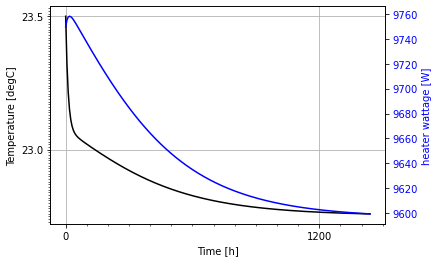

In [20]:
ts = np.linspace(0,24*60,24*10+1)
Tf, Hf, cf= simulate2(T0=Tsteady,Tamb=Tamb,grid=ts,c0=90)

subplots()

plot(ts,Tf,'k')
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=1200))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=100))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.01))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts, Hf, 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')

show()

#ramp

{'x': MX(vertcat(T, c)), 't': MX(t), 'ode': MX(vertcat((((10100+(500*tanh(((c-200)/200))))-(540.541*(T-5)))/6550), ((1.8*(T-23.5))-(0.006*(c-200)))))}


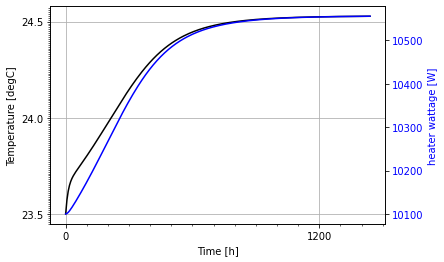

In [21]:
ts = np.linspace(0,24*60,24*10+1)
def Hoffset(t):
    return 100
Tf, Hf, cf= simulate2(T0=Tsteady,Tamb=Tamb,grid=ts,c0=200,Hoffset=Hoffset)

subplots()

plot(ts,Tf,'k')
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=1200))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=100))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.01))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts, Hf, 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')

show()

#ramp

{'x': MX(vertcat(T, c)), 't': MX(t), 'ode': MX(vertcat((((10000+(500*tanh(((c-200)/200))))-(540.541*(T-5)))/6550), ((1.8*(T-23.5))-(0.006*(c-200)))))}


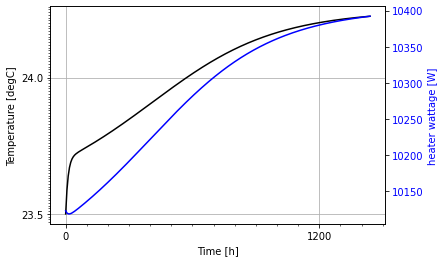

In [22]:
ts = np.linspace(0,24*60,24*10+1)
Tf, Hf, cf= simulate2(T0=Tsteady,Tamb=Tamb,grid=ts,c0=250)

subplots()

plot(ts,Tf,'k')
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=1200))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=100))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.01))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts, Hf, 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')

show()

#ramp

{'x': MX(vertcat(T, c)), 't': MX(t), 'ode': MX(vertcat((((10000+(500*tanh(((c-200)/200))))-(540.541*(T-5)))/6550), ((1.8*(T-23.5))-(0.006*(c-200)))))}


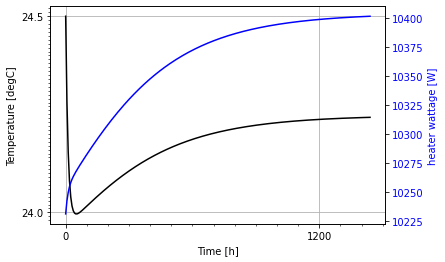

In [23]:
ts = np.linspace(0,24*60,24*10+1)
Tf, Hf, cf= simulate2(T0=Tsteady+1,Tamb=Tamb,grid=ts)

subplots()

plot(ts,Tf,'k')
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=1200))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=100))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.01))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts, Hf, 'b')
tick_params(axis='y', labelcolor='b')
ylabel('heater wattage [W]',color='b')

show()

#ramp

{'x': MX(vertcat(T, c)), 't': MX(t), 'ode': MX(vertcat((((10000+(500*tanh(((c-200)/200))))-(540.541*(T-5)))/6550), (((3*(((0.03*sin((3.14159*(2.*((t/5)/600)))))+(0.05*sin((3.14159*(2.*((t/5)/6000))))))+(0.01*cos((3.14159*(2.*((t/5)/3000)))))))+(1.8*(T-23.5)))-(0.006*(c-200)))))}
25.013953820151432


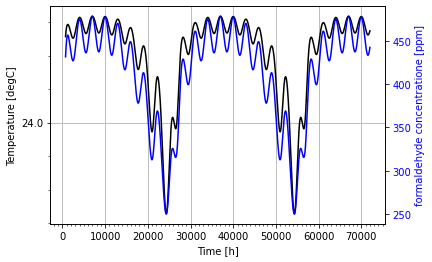

In [24]:
ts = np.linspace(0,24*3000,100000)
def dc_offset(t):
    return 3*(0.03*sin(t/5/600*2*pi)+0.05*sin(t/5/6000*2*pi)+0.01*cos(t/5/3000*2*pi))
Tf, Hf, cf = simulate2(T0=Tsteady,Tamb=Tamb,grid=ts,dc_offset=dc_offset)


N = 100000

Nstart = 1000

n = N-Nstart

subplots()

plot(ts[Nstart:Nstart+n],Tf[Nstart:Nstart+n],'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1000))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts[Nstart:Nstart+n],cf[Nstart:Nstart+n], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('formaldehyde concentratione [ppm]',color='b')
#ylim([300,500])


show()

Text(0, 0.5, 'Temperature [degC]')

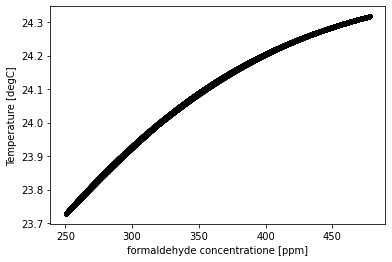

In [25]:
plot(cf[N//2:],Tf[N//2:],'.k')
xlabel('formaldehyde concentratione [ppm]')
ylabel('Temperature [degC]')

25.013953820151432


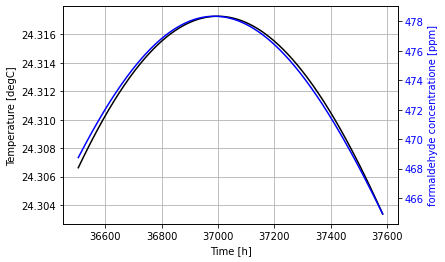

In [26]:
subplots()


N = 100000

Nstart = N//2+700

n = 1500

plot(ts[Nstart:Nstart+n],Tf[Nstart:Nstart+n],'k')
print(xf[-1])
grid(True)

ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts[Nstart:Nstart+n], cf[Nstart:Nstart+n], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('formaldehyde concentratione [ppm]',color='b')

show()

{'x': MX(vertcat(T, c)), 't': MX(t), 'ode': MX(((0.05*(((0.03*sin((3.14159*(2.*((t/5)/600)))))+(0.05*sin((3.14159*(2.*((t/5)/6000))))))+(0.01*cos((3.14159*(2.*((t/5)/3000)))))))+vertcat((((10000+(500*tanh(((c-200)/200))))-(540.541*(T-5)))/6550), ((1.8*(T-23.5))-(0.006*(c-200))))))}
25.013953820151432


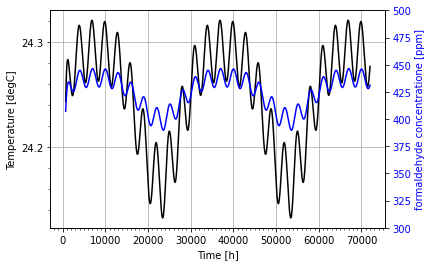

In [27]:
ts = np.linspace(0,24*3000,100000)
def dT_offset(t):
    return 0.1*0.5*(0.03*sin(t/5/600*2*pi)+0.05*sin(t/5/6000*2*pi)+0.01*cos(t/5/3000*2*pi))
Tf, Hf, cf = simulate2(T0=Tsteady,Tamb=Tamb,grid=ts,dT_offset=dT_offset)


N = 100000

Nstart = 1000

n = N-Nstart
subplots()

plot(ts[Nstart:Nstart+n],Tf[Nstart:Nstart+n],'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1000))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.1))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.02))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts[Nstart:Nstart+n],cf[Nstart:Nstart+n], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('formaldehyde concentratione [ppm]',color='b')
ylim([300,500])

show()

25.013953820151432


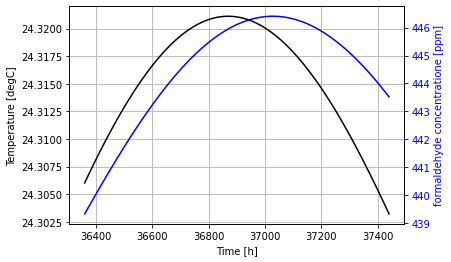

In [28]:
subplots()


N = 100000

Nstart = N//2+500

n = 1500

plot(ts[Nstart:Nstart+n],Tf[Nstart:Nstart+n],'k')
print(xf[-1])
grid(True)

ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts[Nstart:Nstart+n], cf[Nstart:Nstart+n], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('formaldehyde concentratione [ppm]',color='b')

show()

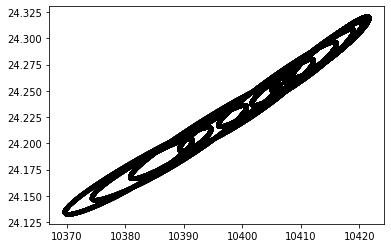

In [29]:
plot(Hf[N//2:],Tf[N//2:],'.k')

{'x': MX(vertcat(T, c)), 't': MX(t), 'ode': MX(((0.05*(((0.03*sin((3.14159*(2.*((t/5)/600)))))+(0.05*sin((3.14159*(2.*((t/5)/6000))))))+(0.01*cos((3.14159*(2.*((t/5)/3000)))))))+vertcat((((10000+(500*tanh(((c-200)/200))))-(540.541*(T-5)))/6550), ((((72000<=t)?5:0)+(1.8*(T-23.5)))-(0.006*(c-200))))))}
25.013953820151432


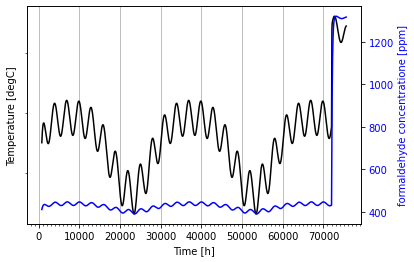

In [30]:
ts = np.linspace(0,24*3000*1.05,100000)
def dT_offset(t):
    return 0.1*0.5*(0.03*sin(t/5/600*2*pi)+0.05*sin(t/5/6000*2*pi)+0.01*cos(t/5/3000*2*pi))
def dc_offset(t):
    return ca.if_else(t>=24*3000,5,0)
Tf, Hf, cf = simulate2(T0=Tsteady,Tamb=Tamb,grid=ts,dT_offset=dT_offset,dc_offset=dc_offset)


N = 100000

Nstart = 1000

n = N-Nstart


subplots()

plot(ts[Nstart:Nstart+n],Tf[Nstart:Nstart+n],'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1000))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts[Nstart:Nstart+n], cf[Nstart:Nstart+n], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('formaldehyde concentratione [ppm]',color='b')

show()

25.013953820151432


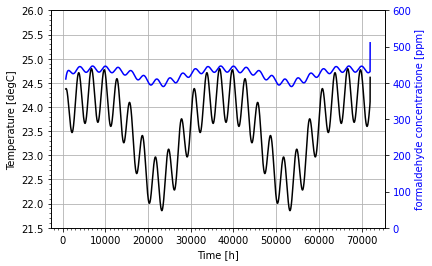

In [31]:
Nstart = 1000
Nend = 100000-4760+20
subplots()

plot(ts[Nstart:Nend],xf[Nstart:Nend],'k')
print(xf[-1])
grid(True)

gca().xaxis.set_major_locator(plt.MultipleLocator(base=10000))
gca().xaxis.set_minor_locator(plt.MultipleLocator(base=1000))

gca().yaxis.set_major_locator(plt.MultipleLocator(base=0.5))
gca().yaxis.set_minor_locator(plt.MultipleLocator(base=0.1))
ylabel('Temperature [degC]')
xlabel('Time [h]')
ylim([21.5,26])

twinx()

plot(ts[Nstart:Nend], cf[Nstart:Nend], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('formaldehyde concentratione [ppm]',color='b')
ylim([0,600])

show()

In [32]:
ts = np.linspace(0,24*3000*1.1,100000)
def dT_offset(t):
    return 0.1*0.5*(0.03*sin(t/5/600*2*pi)+0.05*sin(t/5/6000*2*pi)+0.01*cos(t/5/3000*2*pi))
def dc_offset(t):
    return ca.if_else(t>=24*3000,5,0)
Tf, Hf, cf = simulate2(T0=Tsteady,Tamb=Tamb,grid=ts,dT_offset=dT_offset,dc_offset=dc_offset)



{'x': MX(vertcat(T, c)), 't': MX(t), 'ode': MX(((0.05*(((0.03*sin((3.14159*(2.*((t/5)/600)))))+(0.05*sin((3.14159*(2.*((t/5)/6000))))))+(0.01*cos((3.14159*(2.*((t/5)/3000)))))))+vertcat((((10000+(500*tanh(((c-200)/200))))-(540.541*(T-5)))/6550), ((((72000<=t)?5:0)+(1.8*(T-23.5)))-(0.006*(c-200))))))}


25.013953820151432


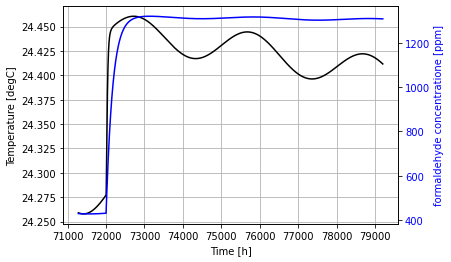

In [33]:
subplots()


N = 100000

Nstart = 90000

n = 10000

plot(ts[Nstart:Nstart+n],Tf[Nstart:Nstart+n],'k')
print(xf[-1])
grid(True)

ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts[Nstart:Nstart+n], cf[Nstart:Nstart+n], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('formaldehyde concentratione [ppm]',color='b')

show()

25.013953820151432


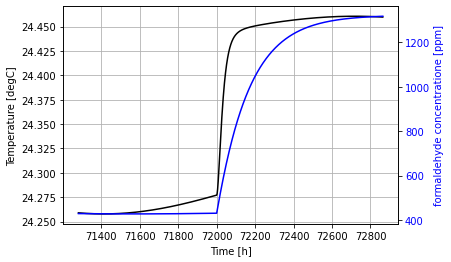

In [34]:
subplots()


N = 100000

Nstart = 90000

n = 2000

plot(ts[Nstart:Nstart+n],Tf[Nstart:Nstart+n],'k')
print(xf[-1])
grid(True)

ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts[Nstart:Nstart+n], cf[Nstart:Nstart+n], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('formaldehyde concentratione [ppm]',color='b')

show()

25.013953820151432


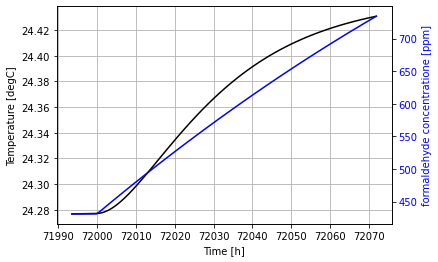

In [35]:
subplots()


N = 100000

Nstart = 90900

n = 100

plot(ts[Nstart:Nstart+n],Tf[Nstart:Nstart+n],'k')
print(xf[-1])
grid(True)

ylabel('Temperature [degC]')
xlabel('Time [h]')

twinx()

plot(ts[Nstart:Nstart+n], cf[Nstart:Nstart+n], 'b')
tick_params(axis='y', labelcolor='b')
ylabel('formaldehyde concentratione [ppm]',color='b')

show()